<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/rvvZiR).**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

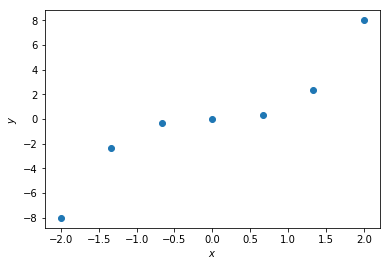

In [11]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

In [3]:
# Ваш код здесь

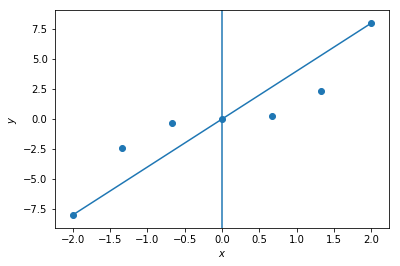

In [12]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.axvline(0)
#plt.axvline(1.5)
#plt.axvline(-1.5)
plt.plot([-2, 0, 2], [-8, 0, 8])
plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

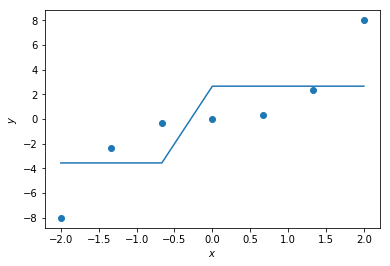

In [13]:
plt.scatter(X, y)

# 1st level
X_l = X[X < 0]
y_l = [y[X < 0].mean()] * X_l.shape[0]

X_r = X[X >= 0]
y_r = [y[X >= 0].mean()] * X_r.shape[0]

y_1 = np.r_[y_l, y_r]
X_1 = np.r_[X_l, X_r]

plt.plot(X_1, y_1)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [14]:
def regression_var_criterion(X, y, t):
    #надо уметь дробить отрезки по t на х, и подсовывать их 
    
    oneX=1./X.shape[0]
    disp = oneX * sum (np.power(y - oneX * np.sum(y), 2))
    return disp

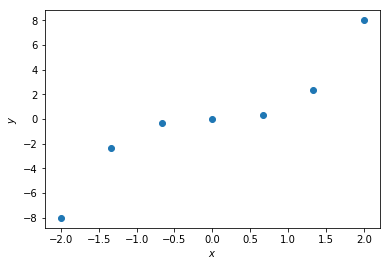

In [15]:
X = np.linspace(-2, 2, 7)
y = X ** 3


plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');


In [16]:
regression_var_criterion(X[2:], y[2:], 0)

9.657064471879286

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- <font color='red'>Нет</font>

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

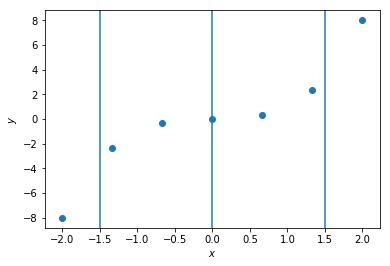

In [17]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.axvline(0)
plt.axvline(1.5)
plt.axvline(-1.5)
#plt.plot([-2, 0, 2], [-8, 0, 8])
plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

**<font color='red'>Вопрос 2.</font> Из скольки отрезков состоит график, изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- <font color='red'>7</font>
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [18]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [19]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах", а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`.

In [20]:
df['age_years'] = df['age']//365
df = pd.get_dummies(data=df, columns=['cholesterol'])
df = pd.get_dummies(data=df, columns=['gluc'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [21]:
y = df['cardio']
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3, random_state=17)

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [32]:
X_train.drop(['cardio'], inplace=True, axis=1)
X_train.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
30908,18243,2,169,76.0,160,80,0,0,1,49,1,0,0,1,0,0
86475,17445,2,158,68.0,140,90,1,0,1,47,1,0,0,1,0,0
77291,22645,1,165,70.0,120,80,0,0,1,62,1,0,0,0,1,0
63162,16778,1,140,70.0,140,90,0,0,0,45,1,0,0,1,0,0
43647,17606,2,172,101.0,120,80,0,0,0,48,1,0,0,1,0,0


In [33]:
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, out_file='../../img/hw_first_tree.dot', filled=True, feature_names=X_train.columns)
!dot -Tpng '../../img/hw_first_tree.dot' -o '../../img/hw_first_tree.png'

/bin/sh: 1: dot: not found


**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- age, ap_hi, chol=3

<font color='red'>age, ap_hi, chol=3</font>

<img src="../../img/hw_first_tree.png">

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [38]:
#X_valid.drop(['cardio'], inplace=True, axis=1)
acc_score = accuracy_score(y_valid, clf_tree.predict(X_valid))
acc_score

0.72128571428571431

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [39]:
tree_params = {'max_depth': list(range(2, 11))}
tree_grid = GridSearchCV(clf_tree, cv=5, param_grid=tree_params) # Ваш код здесь

In [40]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

In [41]:
tree_grid.grid_scores_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.71551, std: 0.00363, params: {'max_depth': 2},
 mean: 0.72771, std: 0.00485, params: {'max_depth': 3},
 mean: 0.73049, std: 0.00453, params: {'max_depth': 4},
 mean: 0.73096, std: 0.00523, params: {'max_depth': 5},
 mean: 0.73196, std: 0.00503, params: {'max_depth': 6},
 mean: 0.73043, std: 0.00355, params: {'max_depth': 7},
 mean: 0.72959, std: 0.00406, params: {'max_depth': 8},
 mean: 0.72778, std: 0.00483, params: {'max_depth': 9},
 mean: 0.72614, std: 0.00523, params: {'max_depth': 10}]

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [42]:
tree_grid.best_params_.get('max_depth')

6

In [44]:
clf_tree2 = DecisionTreeClassifier(max_depth=6, random_state=17)
clf_tree2.fit(X_train, y_train)
acc_score2 = accuracy_score(y_valid, clf_tree2.predict(X_valid))
acc_score2

0.72580952380952379

In [45]:
acc_rise_in_percents = (acc_score2-acc_score)/acc_score * 100
print(acc_rise_in_percents , "%")

0.627186901697 %


**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева четкий пик, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке?**
- да, да
- да, нет
- нет, да
- нет, нет

<font color='red'>да, нет</font>

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках.

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [46]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [47]:
maledict = {1:0, 2:1}
dictTF = {True:1, False:0}
df['male']=df['gender'].map(maledict)
df['age_years'] = df['age']//365
df = pd.get_dummies(data=df, columns=['cholesterol'])

In [48]:
age_45_50 = ((df['age_years'] >= 45) & (df['age_years'] < 50))
age_50_55 = ((df['age_years'] >= 50) & (df['age_years'] < 55))
age_55_60 = ((df['age_years'] >= 55) & (df['age_years'] < 60))
age_60_65 = ((df['age_years'] >= 60) & (df['age_years'] < 65))
df.insert(loc=len(df.columns), column='age_45_50', value=age_45_50.map(dictTF))
df.insert(loc=len(df.columns), column='age_50_55', value=age_50_55.map(dictTF))
df.insert(loc=len(df.columns), column='age_55_60', value=age_55_60.map(dictTF))
df.insert(loc=len(df.columns), column='age_60_65', value=age_60_65.map(dictTF))

In [49]:
ap_hi_120_140 = ((df['ap_hi'] >= 120) & (df['ap_hi'] < 140))
ap_hi_140_160 = ((df['ap_hi'] >= 140) & (df['ap_hi'] < 160))
ap_hi_160_180 = ((df['ap_hi'] >= 160) & (df['ap_hi'] < 180))
df.insert(loc=len(df.columns), column='ap_hi_120_140', value=ap_hi_120_140.map(dictTF))
df.insert(loc=len(df.columns), column='ap_hi_140_160', value=ap_hi_140_160.map(dictTF))
df.insert(loc=len(df.columns), column='ap_hi_160_180', value=ap_hi_160_180.map(dictTF))

In [50]:
df.drop(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'alco', 'active', 'age_years', 'gender'], axis=1, inplace=True)

In [51]:
df.head()

,smoke,cardio,male,cholesterol_1,cholesterol_2,cholesterol_3,age_45_50,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180
id,,,,,,,,,,,,,
0,0,0,1,1,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,0,1,0,0,0,1,0,1,0,0,1,0,0
3,0,1,1,1,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0


In [52]:
df2 = df
y_train = df['cardio']
df2.drop(['cardio'], axis=1, inplace=True)
clear_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
clear_tree.fit(df2, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [53]:
export_graphviz(clear_tree, out_file='../../img/hw_second_tree.dot', filled=True, feature_names=df2.columns)
!dot -Tpng '../../img/hw_second_tree.dot' -o '../../img/hw_second_tree.png'

/bin/sh: 1: dot: not found


In [54]:
df2.head()
accuracy_score(y_train, clear_tree.predict(df2))

0.70540000000000003

<img src="../../img/hw_second_tree.png">

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

<font color='red'>Верхнее артериальное давление от 140 до 160 (мм рт.ст.)</font>